# MAIN FILE : run everything, concat, and save unified geojson
#could add concat and save of half-way files

In [2]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from gis_functions import *

In [3]:
%run -i "tirol_workflow.py"

perfect merge



C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


True    267
dtype: int64
perfect merge



In [2]:
%run -i "sbg_workflow.py"

not all rows have been merged



C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


True    287
dtype: int64
perfect merge



In [ ]:
%run -i "oebo_workflow.py"

In [ ]:
%run -i "noe_workflow.py"

In [1]:
%run -i "karn_workflow.py"

not all rows have been merged



C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


True    673
dtype: int64
perfect merge



In [7]:
%run -i "steyr_workflow.py"

not all rows have been merged

True    1250
dtype: int64
perfect merge

not all rows have been merged

True    1248
dtype: int64
perfect merge



AttributeError: 'GeoDataFrame' object has no attribute 'no_nitri_small'

In [27]:
steyr=geopandas.read_file('final/steyr.geojson')
karn=geopandas.read_file('final/karn.geojson')
tirol=geopandas.read_file('final/tirol.geojson')
oebo=geopandas.read_file('final/oebo.geojson')
sbg=geopandas.read_file('final/sbg.geojson')
noe=geopandas.read_file('final/noe.geojson')


In [30]:
oebo=geopandas.read_file('final/oebo.geojson')


In [31]:
files=[steyr,noe,oebo,tirol,sbg,karn]

In [24]:
cols=['BL','KG','GKZ','freq_small','freq_medium','freq_tot','no_nitri_small',
'no_nitri_medium','no_nitri_tot','sum_PE_small','sum_PE_medium', 'sum_PE_tot','PE_nonitri_small',
'PE_nonitri_medium','PE_nonitri_tot','%PE_nonitri_small','%PE_nonitri_medium','%PE_nonitri_tot', '%no_nitri_small','%no_nitri_medium','%no_nitri_tot' ,'geometry']

In [32]:
steyr=steyr.loc[:,cols]
karn=karn.loc[:,cols]
tirol=tirol.loc[:,cols]
oebo=oebo.loc[:,cols]
sbg=sbg.loc[:,cols]
noe=noe.loc[:,cols]
files=[steyr,karn, tirol,sbg,noe,oebo] 

In [33]:
for file in files:
    print(file.columns)

Index(['BL', 'KG', 'GKZ', 'freq_small', 'freq_medium', 'freq_tot',
       'no_nitri_small', 'no_nitri_medium', 'no_nitri_tot', 'sum_PE_small',
       'sum_PE_medium', 'sum_PE_tot', 'PE_nonitri_small', 'PE_nonitri_medium',
       'PE_nonitri_tot', '%PE_nonitri_small', '%PE_nonitri_medium',
       '%PE_nonitri_tot', '%no_nitri_small', '%no_nitri_medium',
       '%no_nitri_tot', 'geometry'],
      dtype='object')
Index(['BL', 'KG', 'GKZ', 'freq_small', 'freq_medium', 'freq_tot',
       'no_nitri_small', 'no_nitri_medium', 'no_nitri_tot', 'sum_PE_small',
       'sum_PE_medium', 'sum_PE_tot', 'PE_nonitri_small', 'PE_nonitri_medium',
       'PE_nonitri_tot', '%PE_nonitri_small', '%PE_nonitri_medium',
       '%PE_nonitri_tot', '%no_nitri_small', '%no_nitri_medium',
       '%no_nitri_tot', 'geometry'],
      dtype='object')
Index(['BL', 'KG', 'GKZ', 'freq_small', 'freq_medium', 'freq_tot',
       'no_nitri_small', 'no_nitri_medium', 'no_nitri_tot', 'sum_PE_small',
       'sum_PE_medium', 'sum_

# go on from here

In [34]:
data=pd.concat(files)

<AxesSubplot:>

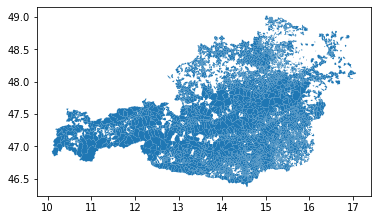

In [35]:
data.plot()


In [36]:
data.groupby('BL').sum()

,GKZ,freq_small,freq_medium,freq_tot,no_nitri_small,no_nitri_medium,no_nitri_tot,sum_PE_small,sum_PE_medium,sum_PE_tot,PE_nonitri_small,PE_nonitri_medium,PE_nonitri_tot,%PE_nonitri_small,%PE_nonitri_medium,%PE_nonitri_tot,%no_nitri_small,%no_nitri_medium,%no_nitri_tot
BL,,,,,,,,,,,,,,,,,,,
Kärnten,13906191,6734.0,318.0,7052.0,2149.0,186.0,2335.0,59923.493151,37909.066667,97832.559817,17332.066667,22326.666667,39658.733333,18649.670312,11124.793282,21577.956706,21096.578643,11220.000000,22053.547821
Niederösterreich,40170236,3744.0,570.0,4314.0,350.0,43.0,393.0,38905.000000,85125.000000,124030.000000,3371.000000,5338.000000,8709.000000,10451.005004,3368.034003,11628.010044,10683.085065,3483.333333,11986.084281
Oberösterreich,27021586,2453.0,180.0,2633.0,2086.0,179.0,2265.0,27430.000000,20742.000000,48172.000000,2689.000000,200.000000,2889.000000,7685.426799,100.000000,7172.474979,55295.236896,14000.000000,57241.009871
Salzburg,14468651,1623.0,85.0,1708.0,298.0,10.0,308.0,20260.826667,10076.133333,30336.960000,3018.333333,1293.666667,4312.000000,4736.878604,702.293130,4447.797708,5737.124294,716.666667,5554.005042
Steiermark,76818034,10232.0,106.0,10338.0,2094.0,35.0,2129.0,79653.000000,7242.000000,86895.000000,12479.000000,3102.000000,15581.000000,22064.242496,2929.411765,22975.168398,30250.812888,2933.333333,30616.645909
Tirol,18845149,1082.0,212.0,1294.0,656.0,53.0,709.0,8707.533333,23677.693333,32385.226667,3586.400000,4762.333333,8348.733333,8796.822019,2604.025697,8509.671424,14762.544561,2705.930736,14261.520052


In [37]:
#rename BLS
data.replace({'Oberösterreich':'Upper-Austria','Steiermark':'Stirya','Niederösterreich':'Lower-Austria','Tirol':'Tirol','Kärnten':'Carintia',}, inplace=True)

In [41]:
data=data.fillna(0)

In [38]:
with open('final/complete.geojson', 'w') as f:
    f.write(data.to_json())


In [39]:
data

,BL,KG,GKZ,freq_small,freq_medium,freq_tot,no_nitri_small,no_nitri_medium,no_nitri_tot,sum_PE_small,...,PE_nonitri_small,PE_nonitri_medium,PE_nonitri_tot,%PE_nonitri_small,%PE_nonitri_medium,%PE_nonitri_tot,%no_nitri_small,%no_nitri_medium,%no_nitri_tot,geometry
0,Stirya,Feistritz,61425,1.0,0.0,1.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.000000,NaN,0.000000,0.0,NaN,0.0,"POLYGON ((14.14081 47.17795, 14.14088 47.17862..."
1,Stirya,Völlegg,61708,17.0,0.0,17.0,0.0,0.0,0.0,202.0,...,0.0,0.0,0.0,0.000000,NaN,0.000000,0.0,NaN,0.0,"POLYGON ((15.58239 47.41321, 15.58229 47.41347..."
2,Stirya,Hart,61055,1.0,0.0,1.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.000000,NaN,0.000000,0.0,NaN,0.0,"POLYGON ((15.55413 46.86375, 15.55396 46.86429..."
3,Stirya,Arzberg,62279,3.0,0.0,3.0,0.0,0.0,0.0,16.0,...,0.0,0.0,0.0,0.000000,NaN,0.000000,0.0,NaN,0.0,"POLYGON ((15.80463 47.46098, 15.80484 47.46097..."
4,Stirya,Kaindorf,62272,3.0,0.0,3.0,3.0,0.0,3.0,50.0,...,50.0,0.0,50.0,100.000000,NaN,100.000000,100.0,NaN,100.0,"POLYGON ((15.90559 47.21368, 15.90552 47.21365..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,Upper-Austria,St. Georgen an der Gusen,41120,1.0,0.0,1.0,1.0,0.0,1.0,6.0,...,0.0,0.0,0.0,0.000000,NaN,0.000000,100.0,NaN,100.0,"POLYGON ((14.46054 48.28146, 14.46051 48.28150..."
653,Upper-Austria,Hartberg,40405,1.0,0.0,1.0,1.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.000000,NaN,0.000000,100.0,NaN,100.0,"POLYGON ((13.06397 48.14910, 13.06396 48.14909..."
654,Upper-Austria,Kampesberg,40710,2.0,0.0,2.0,2.0,0.0,2.0,46.0,...,0.0,0.0,0.0,0.000000,NaN,0.000000,100.0,NaN,100.0,"POLYGON ((13.89386 47.95186, 13.89373 47.95200..."
655,Upper-Austria,Kramberg,41212,2.0,0.0,2.0,1.0,0.0,1.0,11.0,...,6.0,0.0,6.0,54.545455,NaN,54.545455,50.0,NaN,50.0,"POLYGON ((13.47897 48.30079, 13.47884 48.30081..."
